In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('KAG_conversion_data.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.shape

(1143, 11)

In [5]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [8]:
df.ad_id .nunique()

1143

In [9]:
df.xyz_campaign_id.nunique()

3

In [10]:
df.fb_campaign_id.nunique()

691

In [11]:
df.age.nunique()

4

In [10]:
df.interest.nunique()

40

In [11]:
df.Impressions.nunique()

1130

In [12]:
df.Clicks.nunique()

183

In [13]:
df.Total_Conversion.nunique()

32

In [14]:
df.Approved_Conversion.nunique()

16

In [18]:
X = pd.get_dummies(df[["age", "gender"]])
X.head()

,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,1,0,0,0,0,1
1,1,0,0,0,0,1
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,1,0,0,0,0,1


In [13]:
cor=X.corr()
cor

,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
age_30-34,1.000000,-0.405751,-0.365691,-0.417224,-0.030271,0.030271
age_35-39,-0.405751,1.000000,-0.249737,-0.284930,-0.044824,0.044824
age_40-44,-0.365691,-0.249737,1.000000,-0.256799,0.026071,-0.026071
age_45-49,-0.417224,-0.284930,-0.256799,1.000000,0.054980,-0.054980
gender_F,-0.030271,-0.044824,0.026071,0.054980,1.000000,-1.000000
gender_M,0.030271,0.044824,-0.026071,-0.054980,-1.000000,1.000000


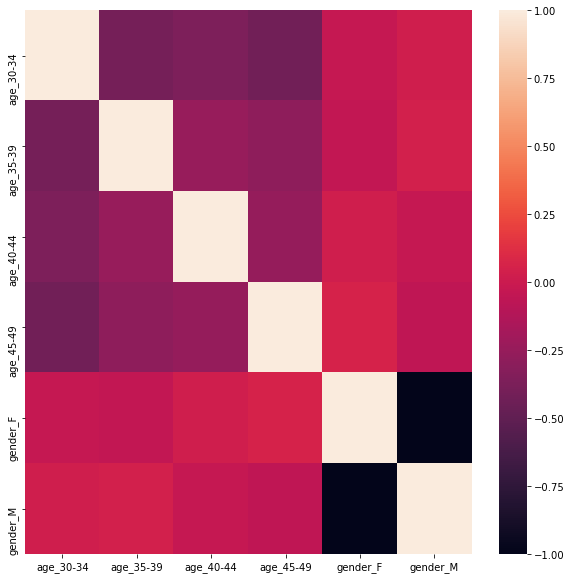

In [14]:
sns.heatmap(cor)

In [134]:
X_1=X.drop(columns=['age_30-34', 'age_35-39', 'age_40-44', 'age_45-49'])
X_1

,gender_F,gender_M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1138,1,0
1139,1,0
1140,1,0
1141,1,0


In [135]:
cor_1=X_1.corr()

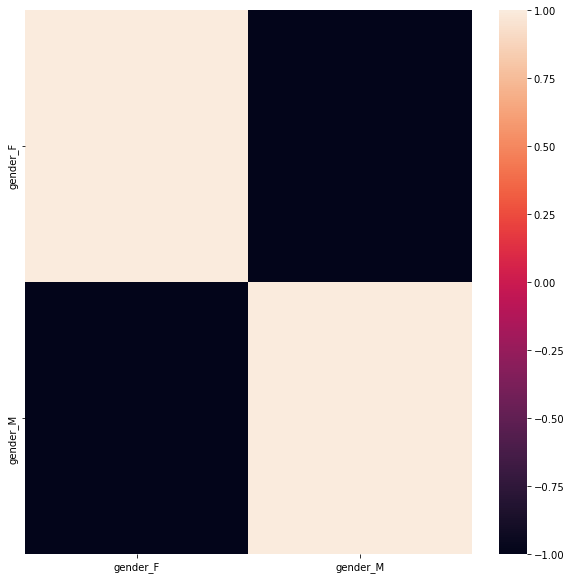

In [136]:
sns.heatmap(cor_1)

There was little correlation between the rest of the columns.But the last two columns were correlated.

In [18]:
k_range=range(2,21)
sse= []
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(xfeatures)
    sse.append(km.inertia_)

In [19]:
sse

[831.7908103203101,
 643.8773079749844,
 474.5143110613075,
 348.2056167737988,
 219.26752645502557,
 104.96190476190495,
 1.2767528861727415e-27,
 1.1055192251892501e-27,
 1.2135962506924397e-27,
 1.3175047934239976e-27,
 1.3394241873070577e-27,
 1.3683123661008884e-27,
 7.769393988652548e-28,
 7.284622014210726e-28,
 1.368885522852338e-27,
 1.4715152481008229e-27,
 1.3959278903874681e-27,
 1.4236389407992894e-27,
 1.467651832632382e-27]

Text(0.5, 1.0, 'Elbow Curve')

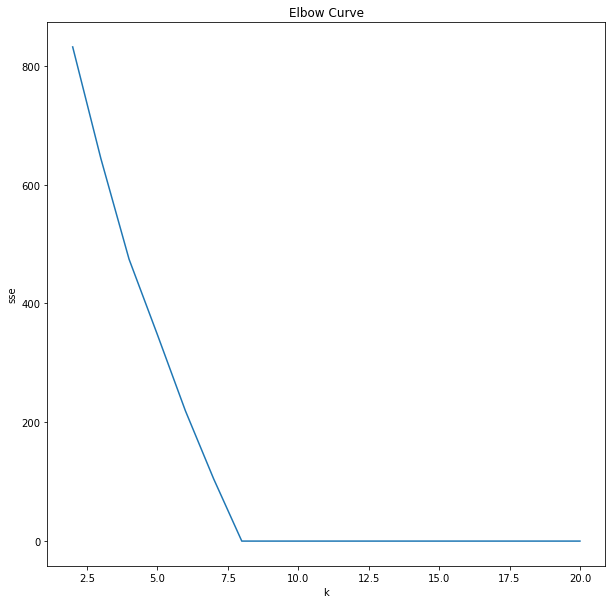

In [20]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_range, sse)
plt.title('Elbow Curve')

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=8, random_state= 42)

In [7]:
xfeatures = X[['gender_F','gender_M', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49']]

In [8]:
y_means = km.fit_predict(xfeatures)

In [9]:
km.labels_

array([2, 2, 2, ..., 5, 5, 5])

In [10]:
km.cluster_centers_

array([[ 0.00000000e+00,  1.00000000e+00, -2.77555756e-16,
         1.00000000e+00, -2.49800181e-16,  8.32667268e-17],
       [ 1.00000000e+00, -6.66133815e-16,  1.00000000e+00,
        -2.49800181e-16, -4.16333634e-16,  3.88578059e-16],
       [ 9.43689571e-16,  1.00000000e+00,  1.00000000e+00,
        -3.05311332e-16, -4.71844785e-16,  5.82867088e-16],
       [-3.33066907e-16,  1.00000000e+00, -1.66533454e-16,
        -2.22044605e-16, -8.32667268e-17,  1.00000000e+00],
       [ 1.00000000e+00,  2.22044605e-16, -2.22044605e-16,
         1.00000000e+00, -8.32667268e-17,  0.00000000e+00],
       [ 1.00000000e+00,  2.22044605e-16, -2.22044605e-16,
        -2.22044605e-16, -1.66533454e-16,  1.00000000e+00],
       [ 1.00000000e+00,  3.33066907e-16, -1.66533454e-16,
        -1.66533454e-16,  1.00000000e+00,  0.00000000e+00],
       [-1.66533454e-16,  1.00000000e+00, -1.11022302e-16,
        -1.94289029e-16,  1.00000000e+00,  0.00000000e+00]])

In [11]:
df['Advert_Type']=y_means

In [26]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,1
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,1
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,1
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,6
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,6
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,6
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,6


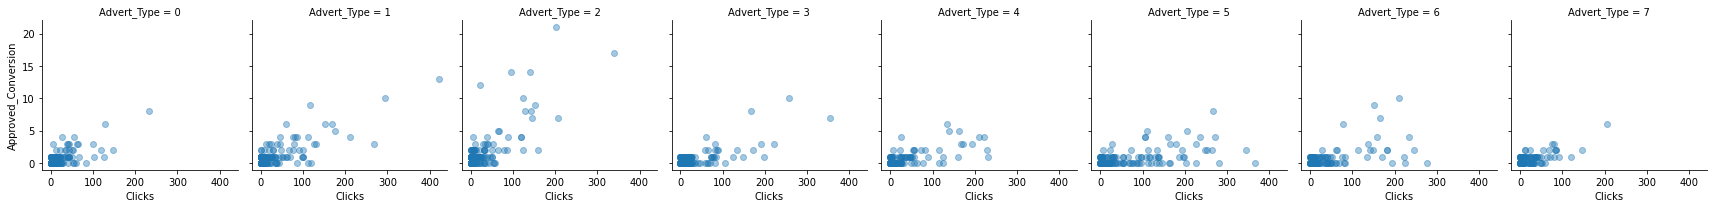

In [13]:

g = sns.FacetGrid(df, col="Advert_Type")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();



The clicks represent the consstency while the approved conversion represent the sales.
The advert type 2 had the highest number of sales and clicks then advert type 6

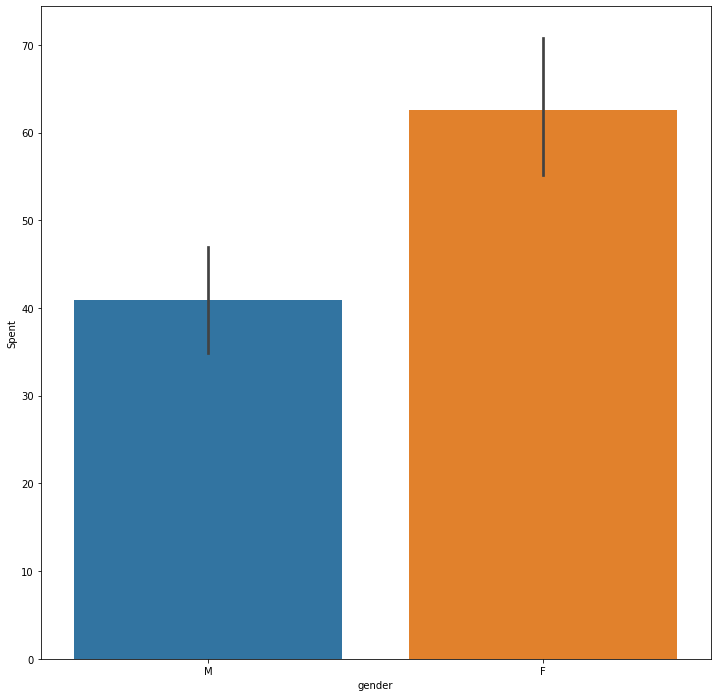

In [14]:
sns.barplot(data=df, x='gender', y='Spent')

More was spent to target the female clients than the male clientele.
Their products are not gender neutral since the target either men or women

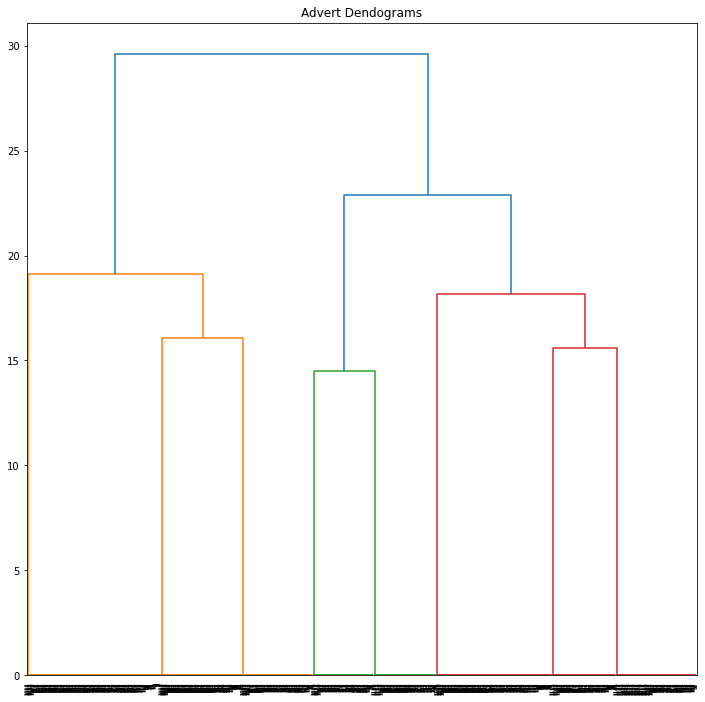

In [19]:
import scipy.cluster.hierarchy as shc

plt.figure()
plt.title("Advert Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

There are way more clusters in the elbow method than the hierarchical clustering method